In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates




In [57]:
df = pd.read_csv('..\data\TSLA.csv')
df_1yr = pd.read_csv("..\data\TSLA_1yr.csv")



In [60]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the data by date
df = df.sort_values(by='Date')


# Convert 'Date' column to datetime format
df_1yr['Date'] = pd.to_datetime(df_1yr['Date'])

# Sort the data by date
df_1yr = df_1yr.sort_values(by='Date')

# Display first few rows

# Display first few rows


In [61]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [62]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:\n", df.describe())

# Check the date range in the dataset
print("\nDate Range:\n", df['Date'].min(), "to", df['Date'].max())


Missing Values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Summary Statistics:
                                 Date         Open         High          Low  \
count                           2956  2956.000000  2956.000000  2956.000000   
mean   2016-05-11 07:21:21.190798336   138.691296   141.771603   135.425953   
min              2010-06-29 00:00:00     3.228000     3.326000     2.996000   
25%              2013-06-05 18:00:00    19.627000    20.402000    19.127500   
50%              2016-05-11 12:00:00    46.656999    47.487001    45.820002   
75%              2019-04-19 00:00:00    68.057001    69.357500    66.911501   
max              2022-03-24 00:00:00  1234.410034  1243.489990  1217.000000   
std                              NaN   250.044839   255.863239   243.774157   

             Close    Adj Close        Volume  
count  2956.000000  2956.000000  2.956000e+03  
mean    138.762183   138.762183  3.

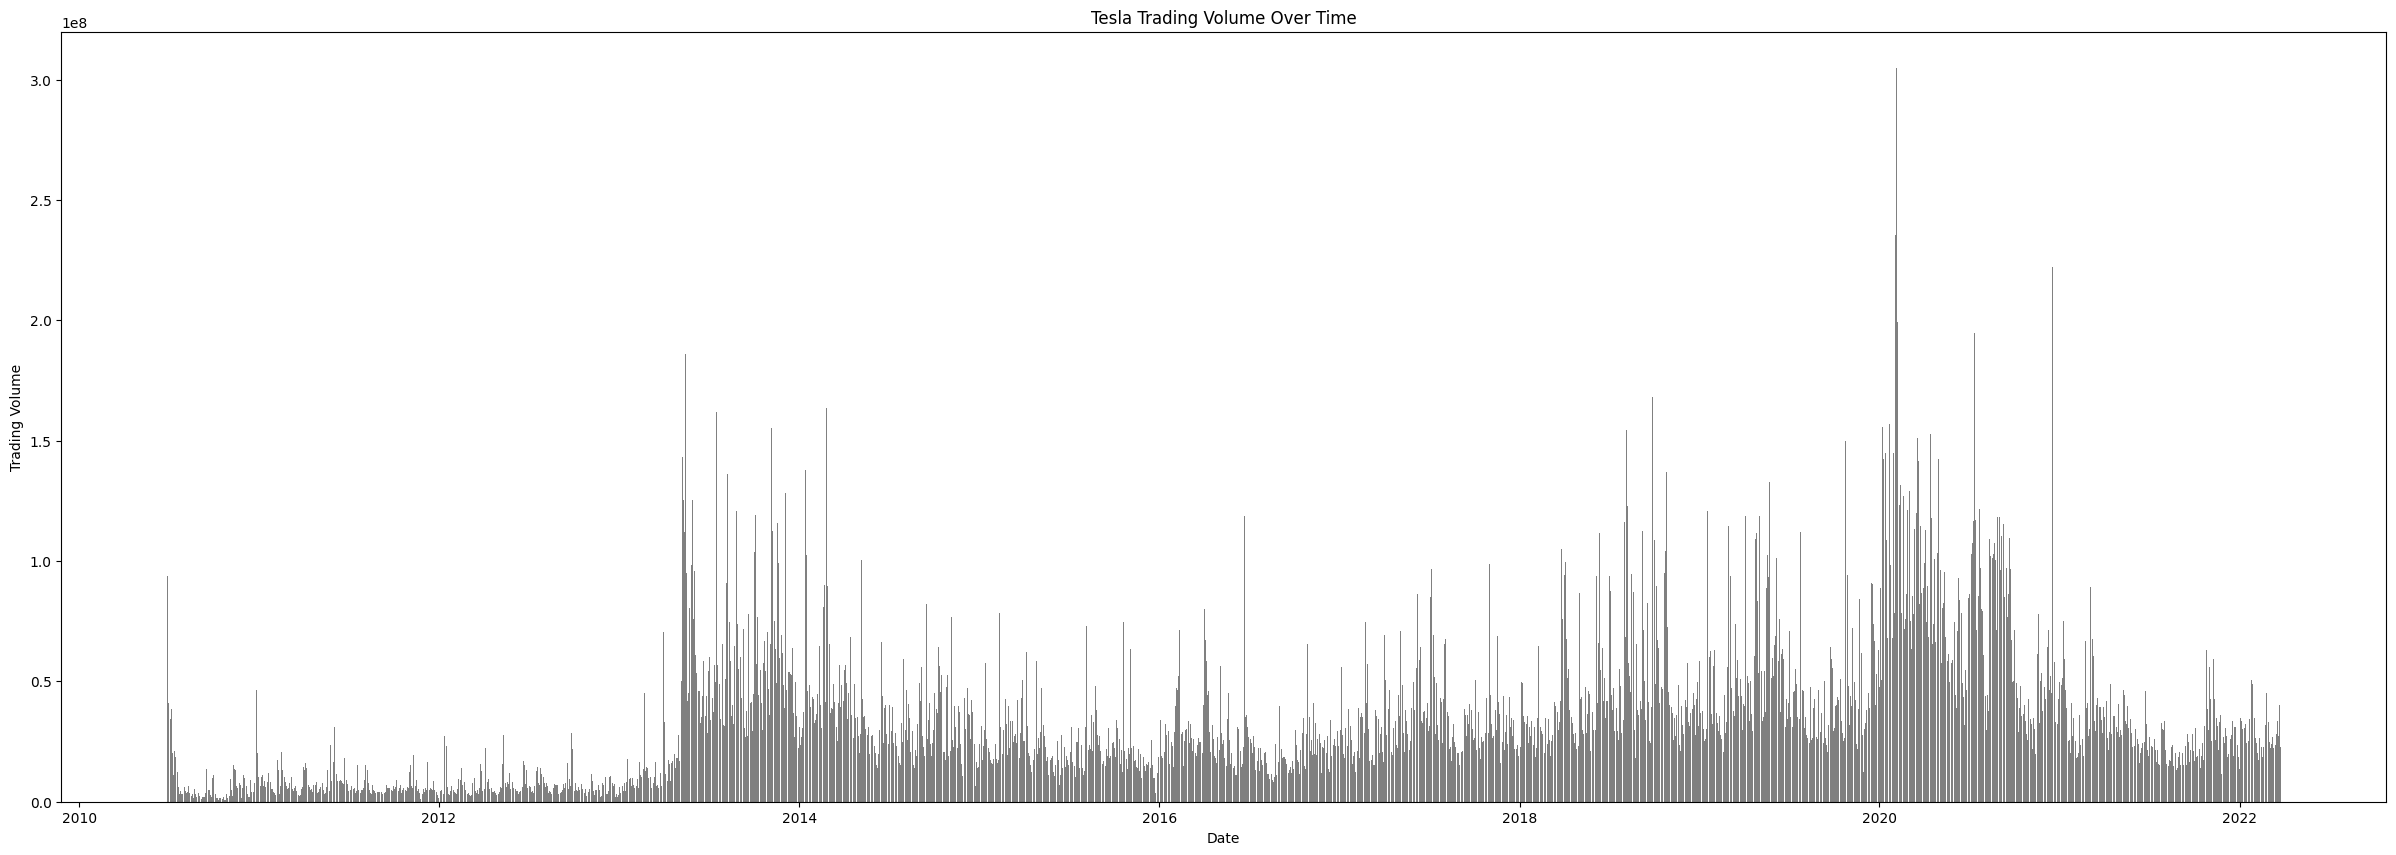

In [63]:
# Plot trading volume over time
plt.figure(figsize=(30, 10))
plt.bar(df['Date'], df['Volume'], color='gray', width=2)
plt.xlabel("Date")
plt.ylabel("Trading Volume")
plt.title("Tesla Trading Volume Over Time")
plt.show()


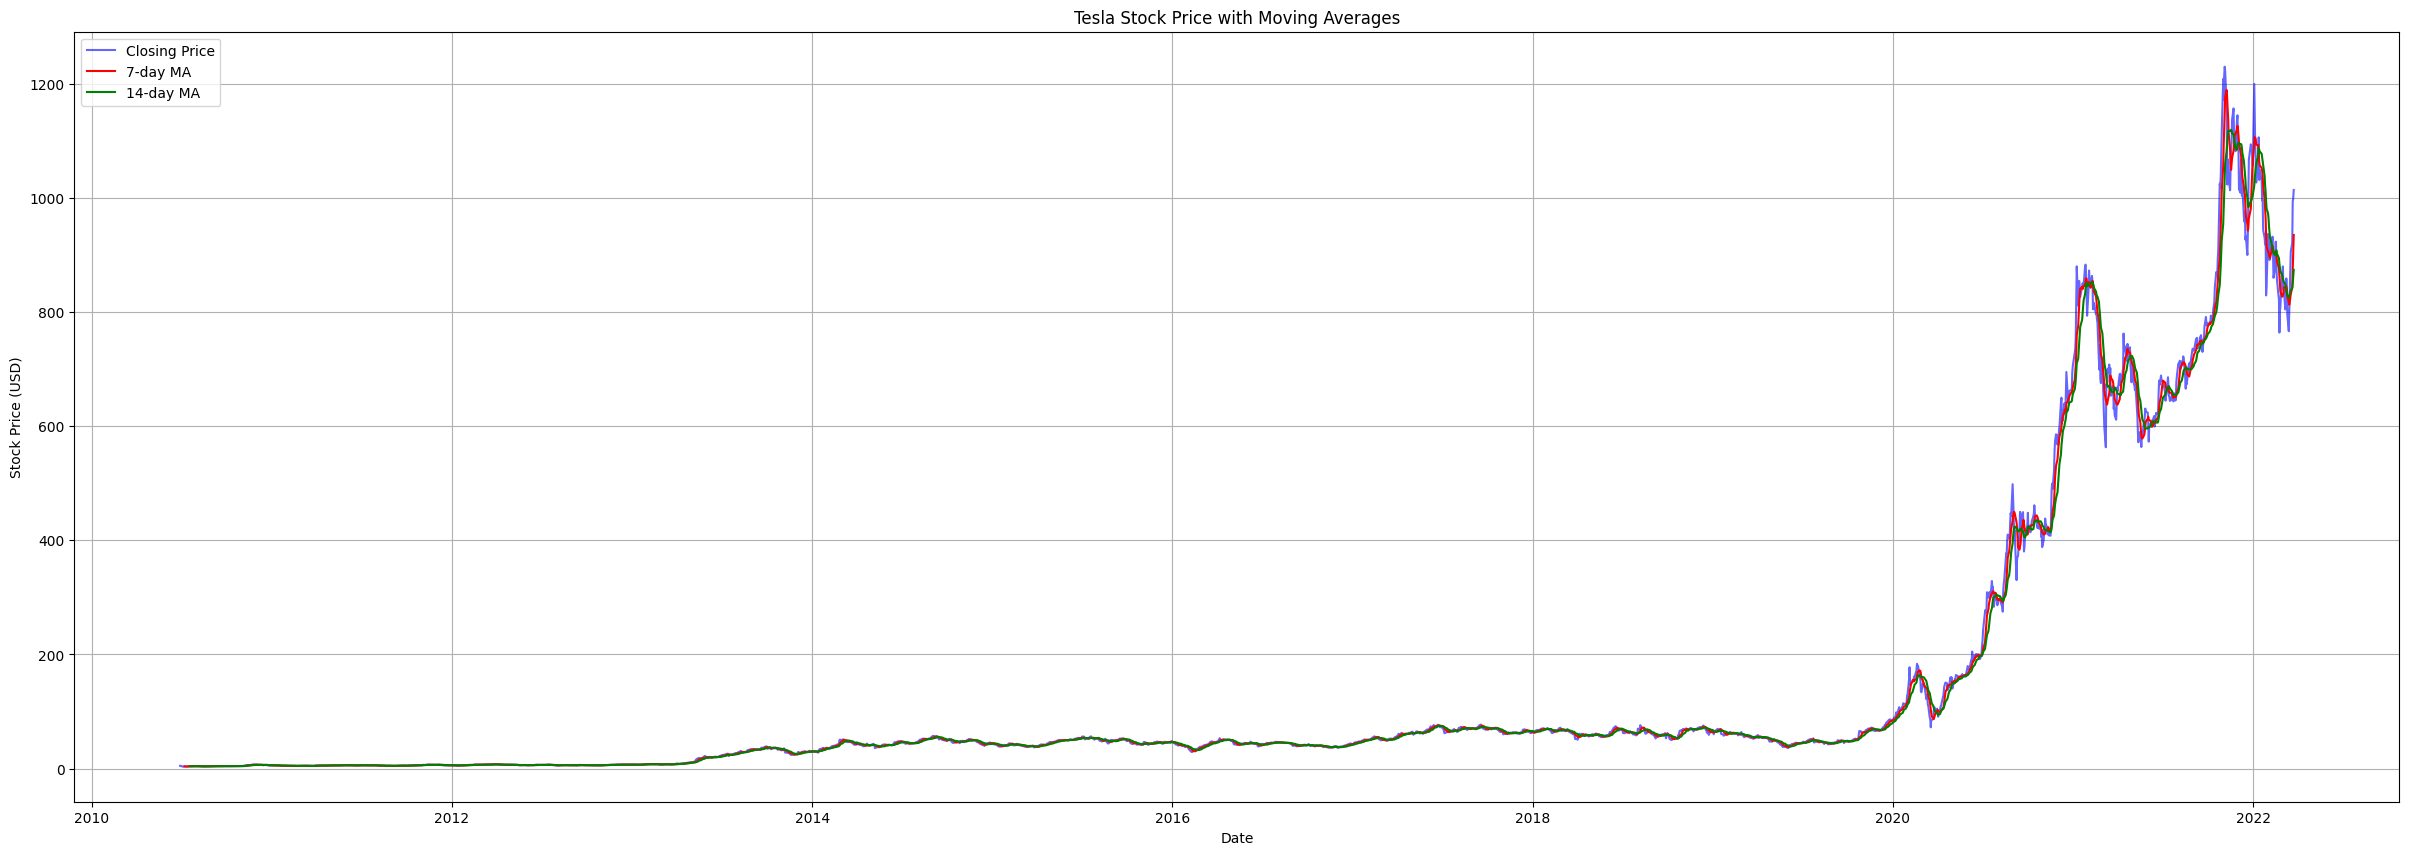

In [56]:
# Compute moving averages (50-day and 200-day)
df['MA7'] = df['Close'].rolling(window=7).mean()
df['MA14'] = df['Close'].rolling(window=14).mean()

# Plot the closing price with moving averages
plt.figure(figsize=(30, 10))
plt.plot(df['Date'], df['Close'], label="Closing Price", color='blue', alpha=0.6)
plt.plot(df['Date'], df['MA7'], label="7-day MA", color='red')
plt.plot(df['Date'], df['MA14'], label="14-day MA", color='green')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Tesla Stock Price with Moving Averages")
plt.legend()
plt.grid()
plt.show()


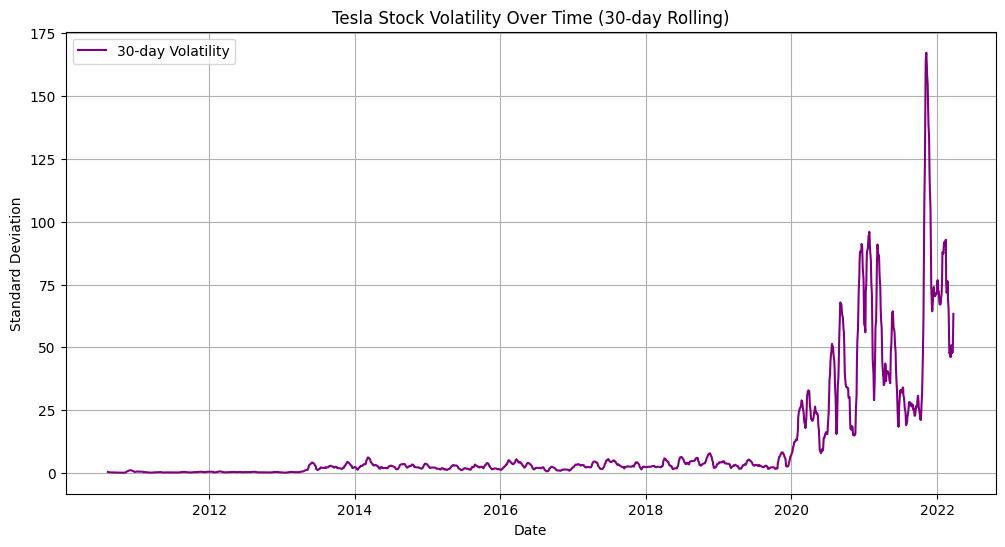

In [73]:
# Compute rolling standard deviation (volatility)
df['Volatility'] = df['Close'].rolling(window=30).std()

# Plot volatility
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volatility'], label="30-day Volatility", color='purple')
plt.xlabel("Date")
plt.ylabel("Standard Deviation")
plt.title("Tesla Stock Volatility Over Time (30-day Rolling)")
plt.legend()
plt.grid()
plt.show()


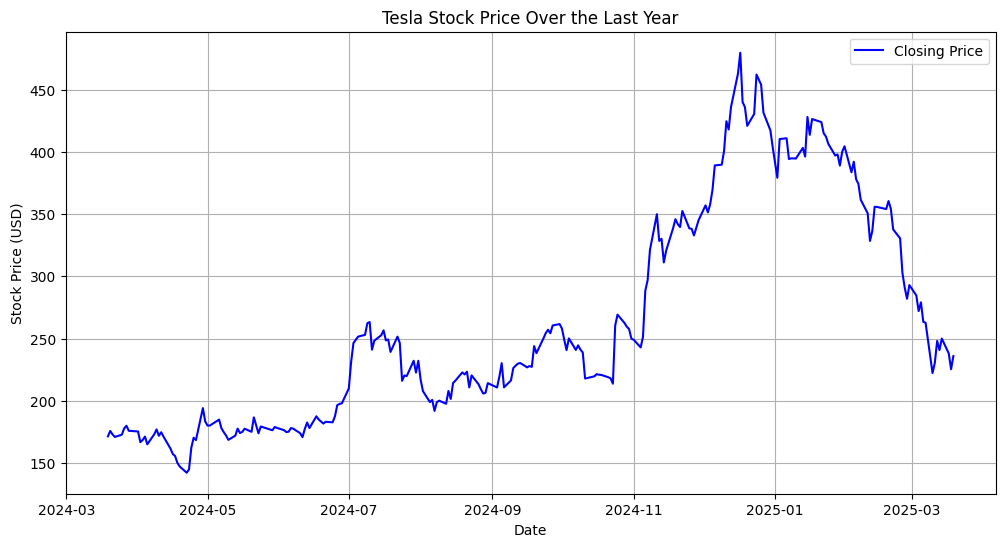

In [64]:
# Plot the closing price over the past year
plt.figure(figsize=(12, 6))
plt.plot(df_1yr['Date'], df_1yr['Close'], label="Closing Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Tesla Stock Price Over the Last Year")
plt.legend()
plt.grid()
plt.show()


In [94]:


# Plot trading volume over time (weekly data for clarity)
plt.figure(figsize=(12, 6))
plt.bar(df_1yr['Date'], df_1yr['Volume'], color='gray', width=10)  # Adjust width for clarity

# Format the x-axis dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Show every 2 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xlabel("Date")
plt.ylabel("Trading Volume")
plt.title("Tesla Trading Volume Over the Last Year (Weekly Aggregated)")
plt.xticks(rotation=45)
plt.show()


KeyError: 'Date'

<Figure size 1200x600 with 0 Axes>

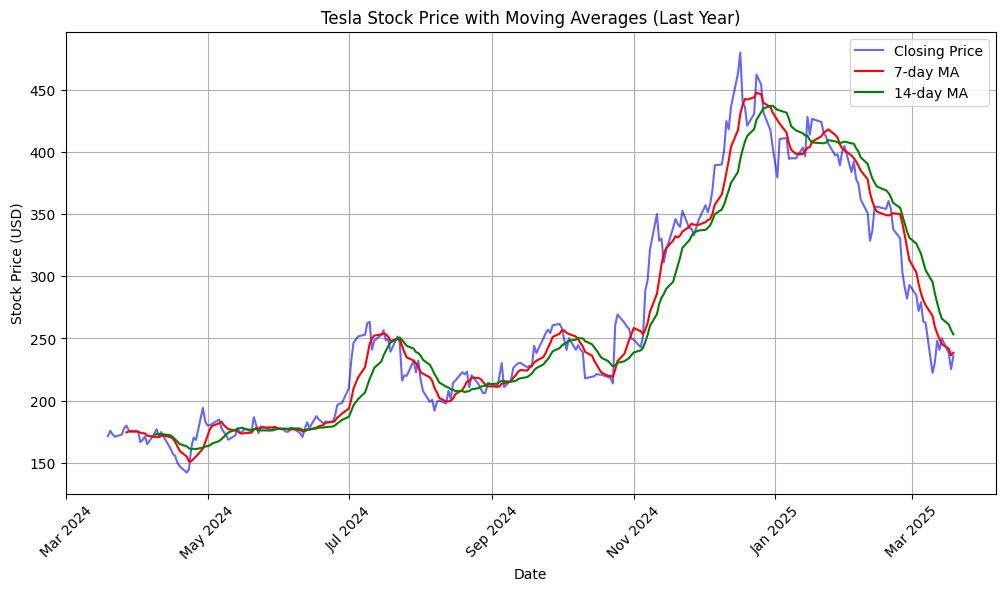

In [ ]:
# Compute moving averages (50-day and 200-day)
df_1yr['MA7'] = df_1yr['Close'].rolling(window=7).mean()
df_1yr['MA14'] = df_1yr['Close'].rolling(window=14).mean()


plt.figure(figsize=(12, 6))
plt.plot(df_1yr['Date'], df_1yr['Close'], label="Closing Price", color='blue', alpha=0.6)
plt.plot(df_1yr['Date'], df_1yr['MA7'], label="7-day MA", color='red')
plt.plot(df_1yr['Date'], df_1yr['MA14'], label="14-day MA", color='green')

# Format the x-axis dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Tesla Stock Price with Moving Averages (Last Year)")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


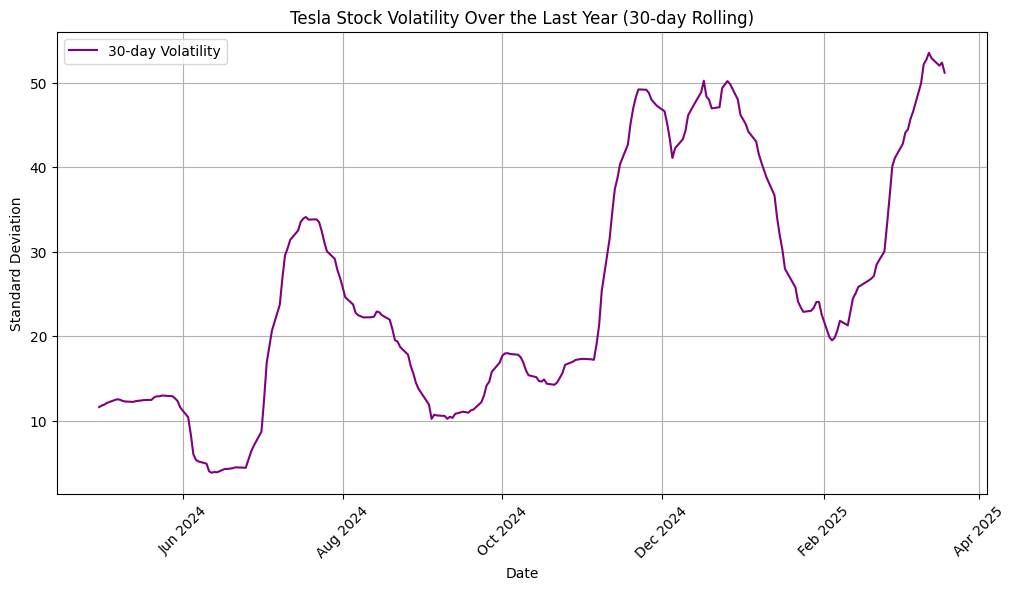

In [86]:
# Compute rolling standard deviation (volatility)
df_1yr['Volatility'] = df_1yr['Close'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(df_1yr['Date'], df_1yr['Volatility'], label="30-day Volatility", color='purple')

# Format the x-axis dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xlabel("Date")
plt.ylabel("Standard Deviation")
plt.title("Tesla Stock Volatility Over the Last Year (30-day Rolling)")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


In [88]:
import numpy as np

# Function to calculate RSI
def calculate_rsi(df, window=14):
    delta = df['Close'].diff()
    gain = np.where(delta > 0, delta, 0)  # Only keep gains
    loss = np.where(delta < 0, -delta, 0)  # Only keep losses

    avg_gain = pd.Series(gain).rolling(window=window, min_periods=1).mean()
    avg_loss = pd.Series(loss).rolling(window=window, min_periods=1).mean()

    rs = avg_gain / (avg_loss + 1e-10)  # Avoid division by zero
    rsi = 100 - (100 / (1 + rs))
    
    df['RSI'] = rsi
    return df

# Calculate RSI for both datasets
df = calculate_rsi(df)
df_1yr = calculate_rsi(df_1yr)


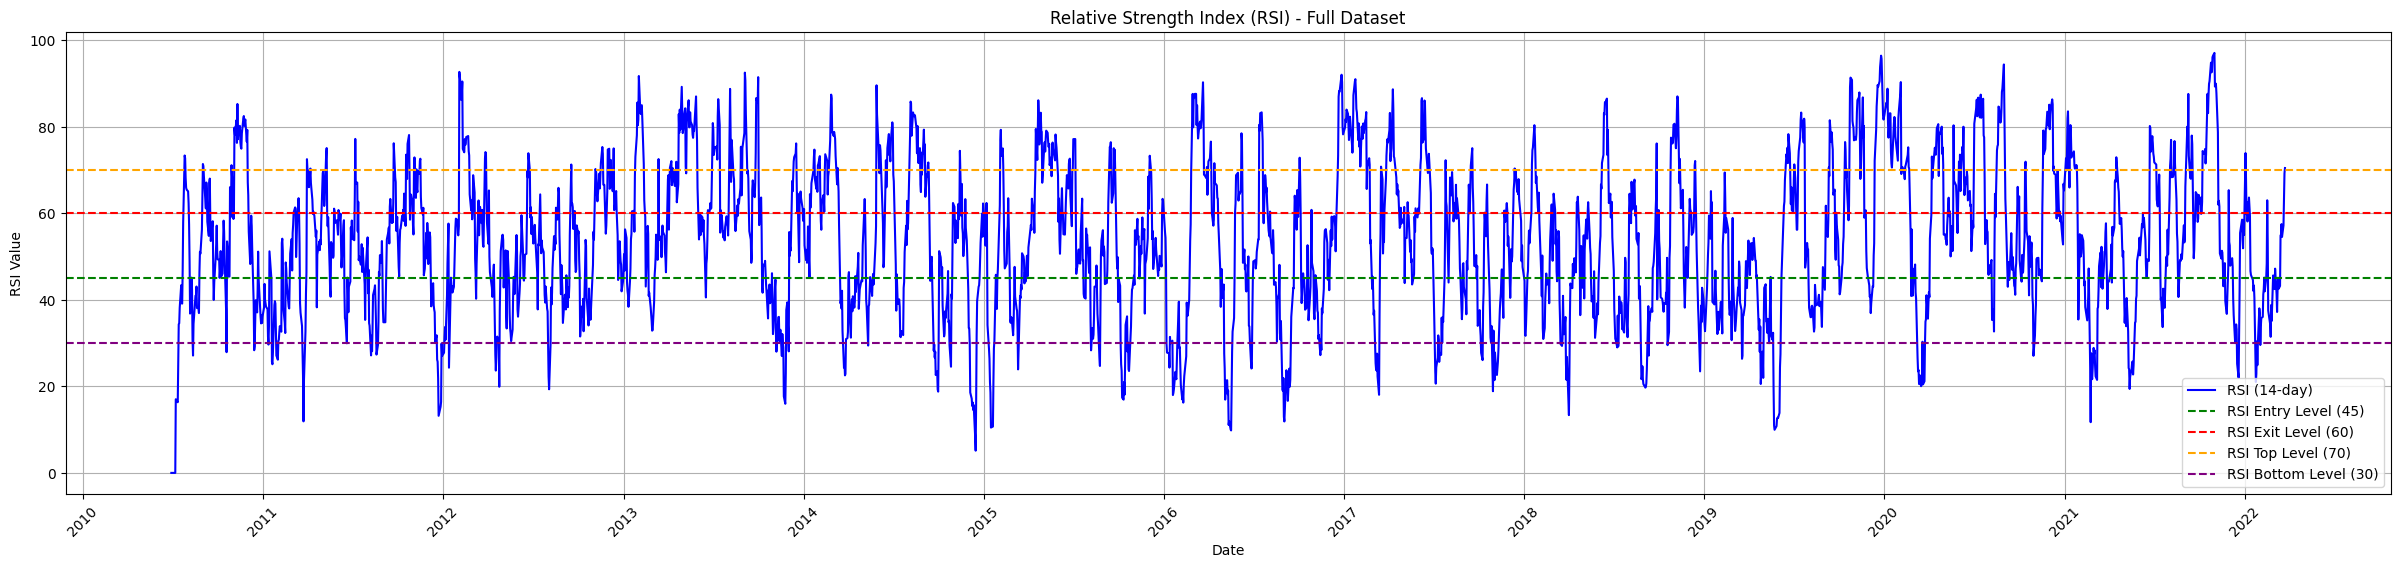

In [90]:
import matplotlib.dates as mdates

plt.figure(figsize=(30, 6))
plt.plot(df['Date'], df['RSI'], label="RSI (14-day)", color='blue')

# Add horizontal reference lines
plt.axhline(45, linestyle="--", color="green", label="RSI Entry Level (45)")
plt.axhline(60, linestyle="--", color="red", label="RSI Exit Level (60)")
plt.axhline(70, linestyle="--", color="orange", label="RSI Top Level (70)")
plt.axhline(30, linestyle="--", color="purple", label="RSI Bottom Level (30)")

# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.title("Relative Strength Index (RSI) - Full Dataset")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


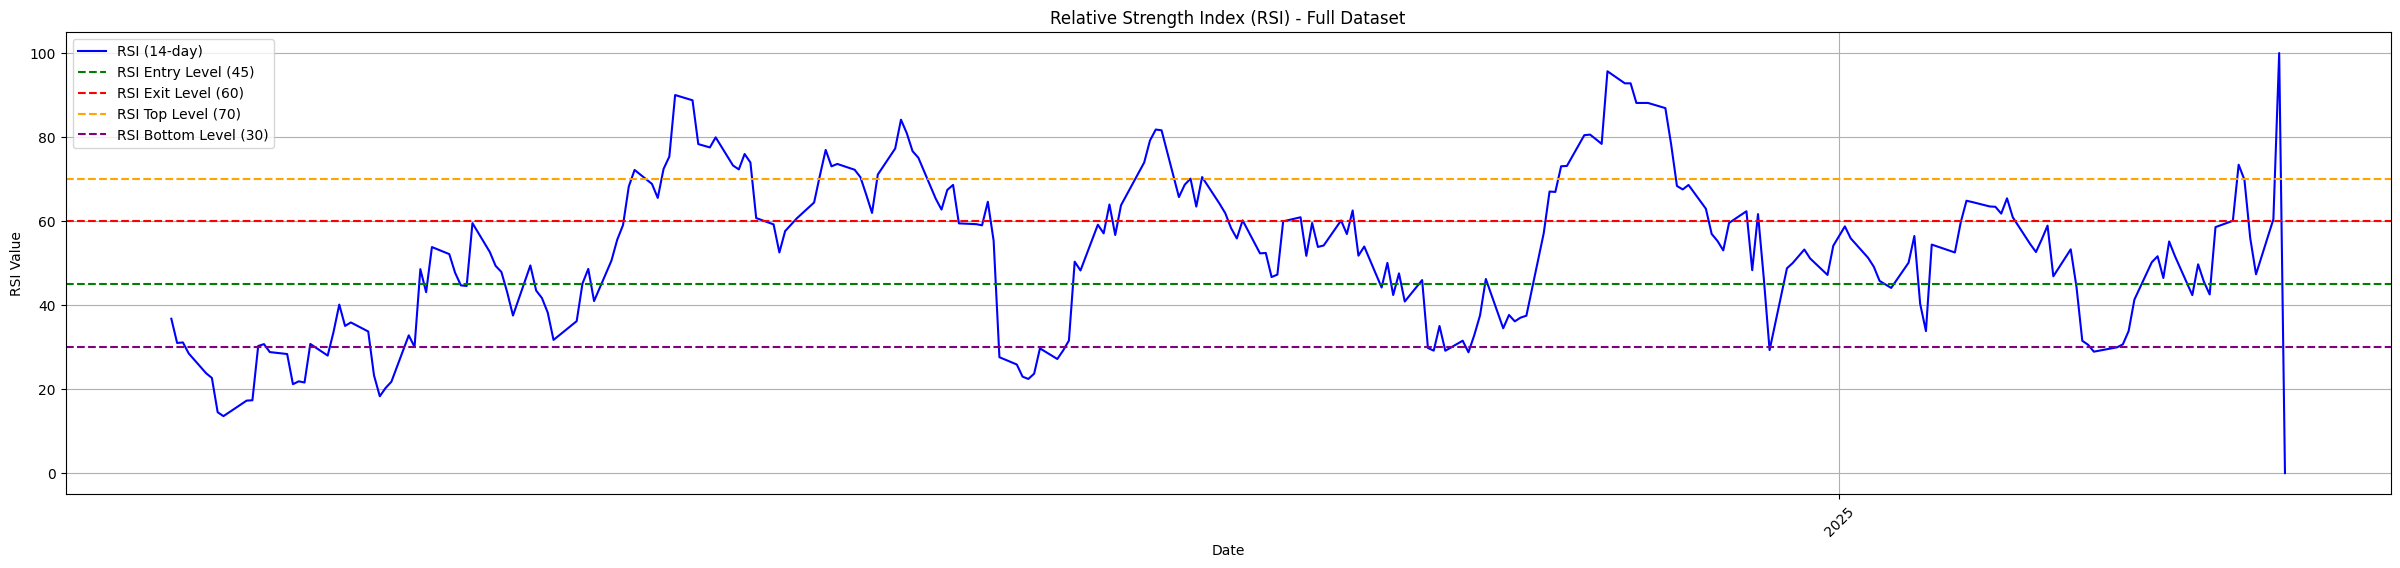

In [91]:
import matplotlib.dates as mdates

plt.figure(figsize=(30, 6))
plt.plot(df_1yr['Date'], df_1yr['RSI'], label="RSI (14-day)", color='blue')

# Add horizontal reference lines
plt.axhline(45, linestyle="--", color="green", label="RSI Entry Level (45)")
plt.axhline(60, linestyle="--", color="red", label="RSI Exit Level (60)")
plt.axhline(70, linestyle="--", color="orange", label="RSI Top Level (70)")
plt.axhline(30, linestyle="--", color="purple", label="RSI Bottom Level (30)")

# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.title("Relative Strength Index (RSI) - Full Dataset")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


In [96]:

# Compute MACD, Signal Line, and Histogram
def compute_macd(data, short_period=7, long_period=14, signal_period=9):
    """Calculates MACD, Signal Line, and MACD Histogram."""
    data['MACD_Line'] = data['Close'].ewm(span=short_period, adjust=False).mean() - data['Close'].ewm(span=long_period, adjust=False).mean()
    data['Signal_Line'] = data['MACD_Line'].ewm(span=signal_period, adjust=False).mean()
    data['MACD_Histogram'] = data['MACD_Line'] - data['Signal_Line']
    return data

# Apply MACD calculation to the dataset
df = compute_macd(df)



In [97]:
df 

,Date,Open,High,Low,Close,Adj Close,Volume,Volatility,RSI,MACD_Line,Signal_Line,MACD_Histogram
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,NaN,0.000000,0.000000,0.000000,0.000000
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,NaN,0.000000,-0.001400,-0.000280,-0.001120
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,NaN,0.000000,-0.045897,-0.009403,-0.036493
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,NaN,0.000000,-0.137690,-0.035061,-0.102629
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,NaN,0.000000,-0.264865,-0.081022,-0.183844
...,...,...,...,...,...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500,48.145209,54.565164,6.209141,-7.534414,13.743555
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200,48.043583,57.232367,13.716165,-3.284298,17.000464
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500,53.494652,62.679201,26.634193,2.699400,23.934793
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400,58.244276,69.281446,34.741605,9.107841,25.633764
